Florian Michael-Schwarzinger
hiv_model

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

/usr/local/Cellar/python/3.6.4_3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def make_system(beta, gamma):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(S=89, I=1, R=0)
    init /= np.sum(init)

    t0 = 0
    t_end = 7 * 14
    dt = .1
    return System(init=init, t0=t0, t_end=t_end, dt = dt,
                  beta=beta, gamma=gamma)

In [3]:
def update_func(state, t, system):
    """Update the SIR model.
    
    state: State (s, i, r)
    t: time
    system: System object
    
    returns: State (sir)
    """
    V, E, L, R, HD, ID = state
    
    ID += (μ*L + μ*R) * system.dt
    HD += (δ*E )* system.dt

    dRdt = (Γ*τ - μ*R - β*R*V)
    dLdt = (ρ*β*R*V - μ*L - α*L)
    dEdt = ((1-ρ)*β*R*V + α*L - δ*E)
    dVdt = (π*E - σ*V)
    
    R += (R + dRdt * system.dt) > 0 and dRdt * system.dt or 0.1
    L += (L + dLdt * system.dt) > 0 and dLdt * system.dt or 0.1
    E += (E + dEdt * system.dt) > 0 and dEdt * system.dt or 0.1
    V += (V + dVdt * system.dt) > 0 and dVdt * system.dt or 0.1
    
    return State(Virions = V, ActiveInfected = E, LatentlyInfected = L, Uninfected = R, HIVDead = HD, NonHIVDead = ID)

In [4]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end/dt):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [5]:
state = State(Virions = 1, 
              ActiveInfected = 0, 
              LatentlyInfected = 0, 
              Uninfected = 1000, 
              HIVDead = 0, 
              NonHIVDead = 0)

,values
Virions,1
ActiveInfected,0
LatentlyInfected,0
Uninfected,1000
HIVDead,0
NonHIVDead,0


In [6]:
t0 = 0
t_end = 200
dt = .01
init = state
system = System(Γ = 1.36, 
                μ = 1.36e-3, 
                τ = 0.2, 
                β = 0.00027, 
                ρ = .1, 
                α = 3.6e-2, 
                σ = 2, 
                δ = 0.33, 
                π = 100, 
                init=init, t0=t0, t_end=t_end, dt = dt)

,values
Γ,1.36
μ,0.00136
τ,0.2
β,0.00027
ρ,0.1
α,0.036
σ,2
δ,0.33
π,100
init,Virions 1 ActiveInfected ...


In [7]:
results = run_simulation(system, update_func)

,Virions,ActiveInfected,LatentlyInfected,Uninfected,HIVDead,NonHIVDead
0,1,0,0,1000,0,0
1,0.98,0.00243,0.00027,999.986,0,0.0136
2,0.96283,0.00480345,0.000534496,999.973,8.019e-06,0.0271998
3,0.948377,0.0071274,0.000794253,999.959,2.38704e-05,0.0407995
4,0.936537,0.00940863,0.00105001,999.946,4.73908e-05,0.0543989
5,0.927215,0.0116536,0.00130247,999.933,7.84393e-05,0.0679982
6,0.920324,0.0138686,0.00155231,999.919,0.000116896,0.0815973
7,0.915786,0.0160596,0.0018002,999.906,0.000162663,0.0951962
8,0.91353,0.0182324,0.00204676,999.892,0.000215659,0.108795
9,0.913492,0.0203926,0.00229263,999.879,0.000275826,0.122394


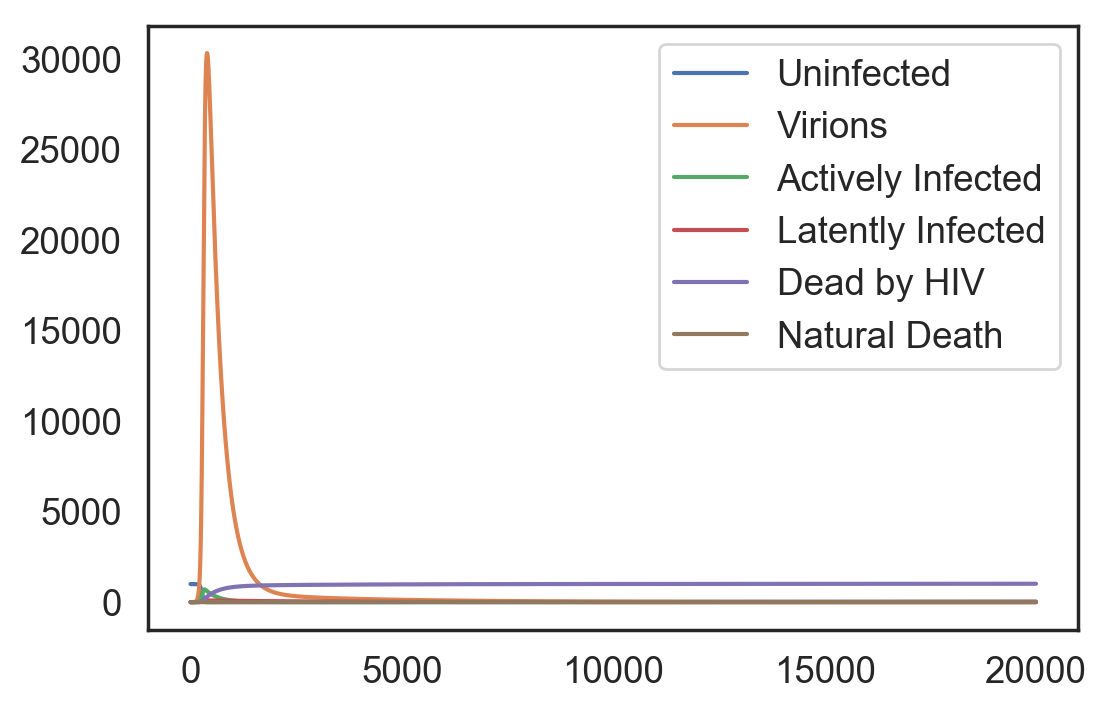

In [8]:
plt.figure(dpi = 200)
plt.plot(results["Uninfected"], label = "Uninfected")
plt.plot(results["Virions"], label = "Virions")
plt.plot(results["ActiveInfected"], label = "Actively Infected")
plt.plot(results["LatentlyInfected"],  label = "Latently Infected")
plt.plot(results["HIVDead"],  label = "Dead by HIV")
plt.plot(results["NonHIVDead"],  label = "Natural Death")

plt.legend()

(0, 1200)

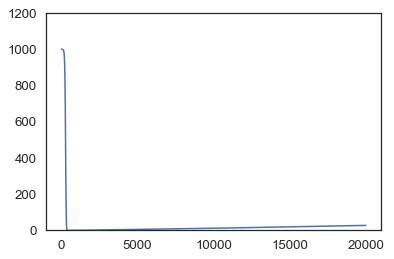

In [9]:
plt.plot(results['Uninfected'])
plt.ylim(0, 1200)